<a href="https://colab.research.google.com/github/FredLongo/MLDL_Project/blob/main/Insomnia_LoadStocksFromFileipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Insomnia - Stock Prediction

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA       #ARIMA model
import matplotlib.pyplot as plt                     # ploting Graphs
from statsmodels.graphics.tsaplots import plot_acf  # ploting more Graphs
from pmdarima.arima.utils import ndiffs             # for ndiffs evaluation
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs



In [3]:
import statsmodels.tsa

##Import Data from Files

In [10]:
#declare filenames
adm_file_path = 'adm.us.txt'
msi_file_path = 'msi.us.txt'
xom_file_path = 'xom.us.txt'

#load files
adm_df = pd.read_csv(adm_file_path)
msi_df = pd.read_csv(msi_file_path)
xom_df = pd.read_csv(xom_file_path)


# Create index of date column
adm_df['Date'] = pd.to_datetime(adm_df['Date'])
adm_df.set_index('Date', inplace=True)

msi_df['Date'] = pd.to_datetime(msi_df['Date'])
msi_df.set_index('Date', inplace=True)

xom_df['Date'] = pd.to_datetime(xom_df['Date'])
xom_df.set_index('Date', inplace=True)


#Just the date and Closeing Column
adm_closing_prices = adm_df['Close']
msi_closing_prices = msi_df['Close']
xom_closing_prices = xom_df['Close']

##Normilize the Data

Notes: Review video for process understanding  https://www.youtube.com/watch?v=gqryqIlvEoM

In [11]:
#Check to see if it needs to be made stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(adm_closing_prices.dropna())
print(f"ADF statistic : {result[0]}")
print(f"p-value: {result[1]}")



ADF statistic : -0.8669609252673927
p-value: 0.7986579049836754


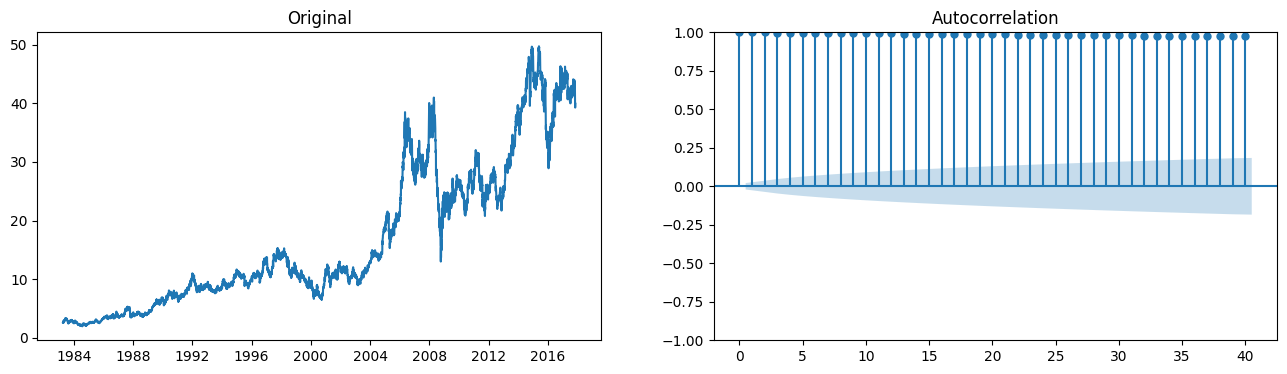

In [12]:
# Corrolation between serias and its lags
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(adm_closing_prices)
ax1.set_title("Original")
plot_acf(adm_closing_prices, ax=ax2);

In [13]:

# To standerdize the differential we need to know how many need to be taken.
#Used to see how many differentials should be taken
diff_num = ndiffs(adm_closing_prices, test="adf")
print(f"Number of Diffrening to run in :{diff_num}")


def x_diffs(df_: pd.DataFrame, x: int) -> pd.DataFrame:
    if x == 0:
        return df_
    else:
        return x_diffs(df_.diff().dropna(), x - 1)




Number of Diffrening to run in :1


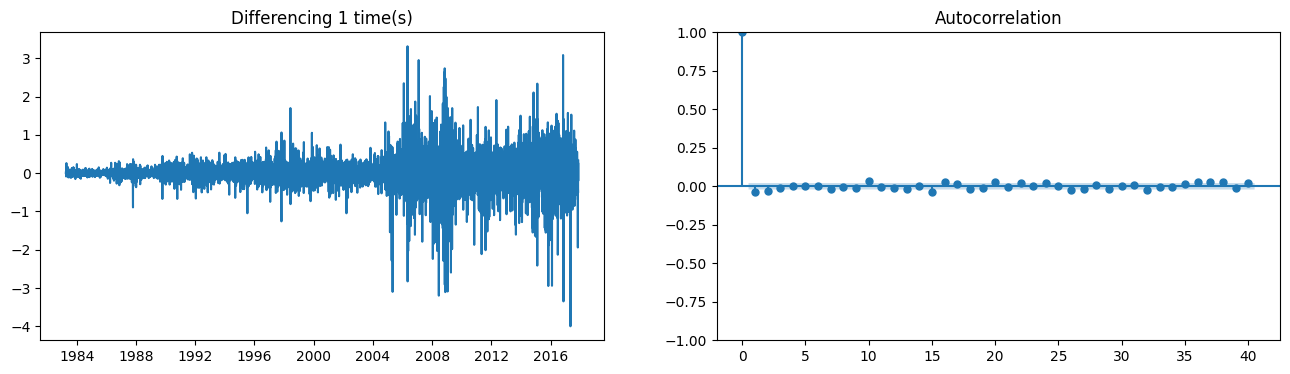

In [14]:
diff_x = x_diffs(adm_closing_prices,diff_num)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff_x)
ax1.set_title(f"Differencing {diff_num} time(s)")
plot_acf(diff_x, ax=ax2);

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs


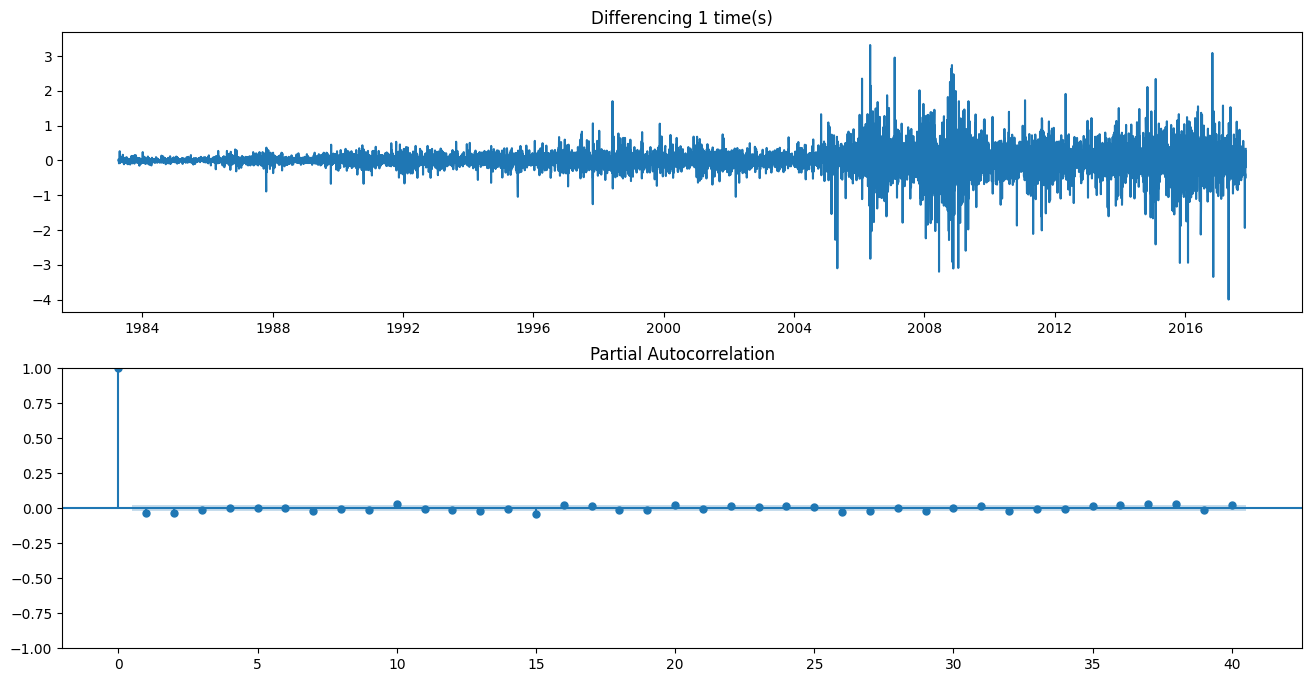

In [33]:
#partial Diffrencing
#import statsmodels
pdiff = adm_closing_prices.diff().dropna()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (16,8))

ax1.plot(pdiff)
ax1.set_title(f"Differencing {diff_num} time(s)")
ax2.set_ylim(0,1)
plot_pacf(pdiff, ax=ax2);

#-------------------------------------------------------------------------------
#  Mapes are not comming out correctly.
#  They look like the ones from 'plot_acf()' but should be 'plot_pacf()'
#-------------------------------------------------------------------------------

## Build Model

In [34]:
!pip install statsmodels

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# Fit the ARIMA model
# The parameters for ARIMA are (p, d, q)
# p: periods taken for autoregressive model
      # lag observations

# d: Integrated order, difference
      #
# q: periods in moving average model

model = ARIMA(adm_closing_prices, order=(1, 1, 0))  # Example parameters


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
result = model.fit()


In [42]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8726
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3771.187
Date:                Mon, 22 Apr 2024   AIC                           7546.375
Time:                        18:01:37   BIC                           7560.523
Sample:                             0   HQIC                          7551.196
                               - 8726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0351      0.006     -6.150      0.000      -0.046      -0.024
sigma2         0.1390      0.001    187.424      0.000       0.138       0.140
Ljung-Box (L1) (Q):                   0.02   Jarque-

(array([3.11274342e-04, 1.40073454e-03, 3.11274342e-03, 1.43186197e-02,
        1.12058763e-01, 1.12541238e+00, 8.96470105e-02, 9.49386743e-03,
        1.55637171e-03, 7.78185855e-04]),
 array([-3.99870178, -3.26237353, -2.52604528, -1.78971703, -1.05338878,
        -0.31706053,  0.41926772,  1.15559598,  1.89192423,  2.62825248,
         3.36458073]),
 <BarContainer object of 10 artists>)

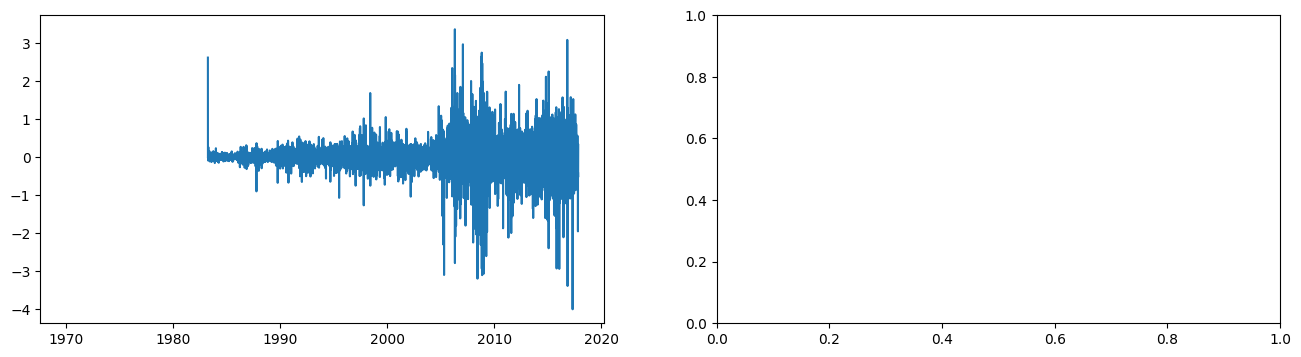

In [44]:
# plot  residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))

ax1.plot(residuals)
ax1.hist(residuals, density=1)




In [40]:
# Actual vs Fitted
#result.plot_predict(start = 1, end=60, dynamic=False,)
